# Things to Note before starting

#### Refer to the README file first! 

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
import time
label_encoder = LabelEncoder()

### Reading The Data

In [28]:
# Read Data in the File| Don't forget to include the file format
df = pd.read_csv("data/full_data.csv")

df.head()

,Able_to_Implement_Maintain_Change__c,Account_Clasification__c,Account_Country__c,Account_Owner_Manager_Name__c,Account_Owner_On_financingapproved__c,Account_Owner_Role__c,Account_Sub__c,AccountId,Active_marketing_in_practice__c,ADAPT_Account_Type__c,...,YR_1_Months__c,YR_2_End_Date__c,Yr_2_Incremental__c,YR_2_Months__c,YR_3_End_Date__c,Yr_3_Incremental__c,YR_3_Months__c,converted_lead__c,Finance_duration_years__c,Monthly_leasing_fee__c
0,NaN,NaN,NaN,NaN,NaN,NaN,Private Practice,0010H00002kMkX5QAK,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Private Practice,0016S00002y5wmbQAA,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Private Practice,0010H00002pvsjvQAA,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Private Practice,0010H00002kMZ3nQAG,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,Private Practice,0010H00002kMkX5QAK,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
X = df[["Doctor_segment__c","Days_Demo_to_Contract__c","Order_Age__c","Stage_age__c","Trade_In__c","Closed_Reason__c","Go_Digital__c","Sale_Type__c"]]
y = df['IsWon']

print(X.shape,y.shape)

(113804, 8) (113804,)


In [30]:
X.isnull().sum()

Doctor_segment__c            44499
Days_Demo_to_Contract__c    106469
Order_Age__c                106963
Stage_age__c                 26254
Trade_In__c                 107322
Closed_Reason__c             42725
Go_Digital__c                    0
Sale_Type__c                  2994
dtype: int64

In [31]:
X.head()

,Doctor_segment__c,Days_Demo_to_Contract__c,Order_Age__c,Stage_age__c,Trade_In__c,Closed_Reason__c,Go_Digital__c,Sale_Type__c
0,NaN,NaN,NaN,129.0,NaN,NaN,False,LATAM Resale
1,NaN,NaN,NaN,71.0,NaN,NaN,False,LATAM Resale
2,NaN,NaN,NaN,71.0,NaN,NaN,False,LATAM Resale
3,NaN,NaN,NaN,71.0,NaN,NaN,False,LATAM Resale
4,NaN,NaN,NaN,71.0,NaN,NaN,False,LATAM Resale


In [32]:
def preprocess_data(X):
    X["Days_Demo_to_Contract__c"] = X["Days_Demo_to_Contract__c"].fillna(0)
    X["Order_Age__c"] = X["Order_Age__c"].fillna(0)
    X["Stage_age__c"] = X["Stage_age__c"].fillna(0)
    
    

    ### For Numerical Columns
    scaler = MinMaxScaler(feature_range = (0,1))
    df_numeric = X.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    
    for col in numeric_cols:
        X[col] = scaler.fit_transform(X[[col]])
        
    print("---Successfully processed numeric column(s)")
    print(X.head(5))
    
    
    ##For Categorical Columns
    ## Converting Columns into one-hot encoding
    df_categorical = X.select_dtypes(exclude=[np.number])
    categorical_cols = df_categorical.columns.values
    
    for cat_cols in categorical_cols:
        X[cat_cols] = label_encoder.fit_transform(X[cat_cols])
    
    print("---Successfully processed categorical column(s)")
    print(X.head(5))
    
    return X

In [33]:
X = preprocess_data(X)

---Successfully processed numeric column(s)
  Doctor_segment__c  Days_Demo_to_Contract__c  Order_Age__c  Stage_age__c  \
0               NaN                  0.478313      0.072464      0.309524   
1               NaN                  0.478313      0.072464      0.171429   
2               NaN                  0.478313      0.072464      0.171429   
3               NaN                  0.478313      0.072464      0.171429   
4               NaN                  0.478313      0.072464      0.171429   

  Trade_In__c Closed_Reason__c  Go_Digital__c  Sale_Type__c  
0         NaN              NaN          False  LATAM Resale  
1         NaN              NaN          False  LATAM Resale  
2         NaN              NaN          False  LATAM Resale  
3         NaN              NaN          False  LATAM Resale  
4         NaN              NaN          False  LATAM Resale  
---Successfully processed categorical column(s)
   Doctor_segment__c  Days_Demo_to_Contract__c  Order_Age__c  Stage_age__

In [34]:
X.isnull().sum()

Doctor_segment__c           0
Days_Demo_to_Contract__c    0
Order_Age__c                0
Stage_age__c                0
Trade_In__c                 0
Closed_Reason__c            0
Go_Digital__c               0
Sale_Type__c                0
dtype: int64

In [35]:
X.shape

(113804, 8)

### Split Data into training and Testing Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 50, stratify = y)
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(91043, 8) (22761, 8) (91043,) (22761,)


# <!-- from sklearn.svm import SVC

svm_classifier = SVC(C=1, verbose=True, kernel="linear")
svm_classifier.fit(X_train,y_train)

y_pred_svm = svm_classifier.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_svm)) -->

In [37]:
logreg = LogisticRegression(solver='liblinear',random_state=10)
logreg.fit(X_train,y_train)

y_pred_logreg = logreg.predict(X_test)

### Grid Search (HyperTuning)

In [38]:
param_grid = {'C': [0.01,0.1,1,10,20,30,40]}
grid = GridSearchCV(LogisticRegression(solver='liblinear'),param_grid,cv=5)

grid.fit(X_train,y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

y_pred_acc = grid.predict(X_test)
print(y_pred_acc)

Best cross-validation score: 0.88
Best parameters:  {'C': 40}
Best estimator:  LogisticRegression(C=40, solver='liblinear')
[False False False ... False False False]


In [39]:
# print("Testing accuracy %s" % accuracy_score(y_test,y_pred_acc))

### Using Decision Tree Classifier to Predict

In [40]:
decision_tree_classifier = DecisionTreeClassifier(random_state = 10).fit(X_train,y_train)
y_pred_DTC = decision_tree_classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test,y_pred_DTC)
print("Train-Test Split accuracy", accuracy)

Train-Test Split accuracy 0.9389745617503624


In [41]:

print("###############################################")
print("Start testing Using XGBoost")
print("###############################################")
modelXGB = xgb.XGBClassifier(learning_rate = 0.4, random_state = 10)
modelXGB.fit(X_train,y_train)

y_pred_XGB = modelXGB.predict(X_test)
accuracy_XGB = metrics.accuracy_score(y_test,y_pred_XGB)
print("Accuracy Score on test dataset : ", accuracy_XGB*100, "%")

print("###############################################")
print("End testing Using XGBoost")
print("###############################################")

# ################################################
print("\n_____________________________________")
print("Start testing Using Logistic Regression")
print("_____________________________________")

logreg = LogisticRegression(solver='liblinear',random_state=10)
logreg.fit(X_train,y_train)

y_pred_logreg = logreg.predict(X_test)
print("Testing accuracy %s" % (accuracy_score(y_test,y_pred_logreg)*100), "%")

print("_____________________________________")
print("Stop testing Using Logistic Regression")
print("_____________________________________")


print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Start testing Using Decision Tree Classifier")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

decision_tree_classifier = DecisionTreeClassifier(random_state = 20).fit(X_train,y_train)
y_pred_DTC = decision_tree_classifier.predict(X_test)

accuracy_DTC = metrics.accuracy_score(y_test,y_pred_DTC)
print("\nTrain-Test Split accuracy", accuracy_DTC*100, "%\n")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Stop testing Using Decision Tree Classifier")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")


print("\nAlignTechAlignTechAlignTechAlignTechAlignTechAlignTech\nStart test using Random Forest Classifier\nAlignTechAlignTechAlignTechAlignTechAlignTechAlignTech")
ranForest = RandomForestClassifier(random_state=5)

ranForest.fit(X_train,y_train)

y_pred_ranForest = ranForest.predict(X_test)
print("\nTrain-Test Split accuracy",metrics.accuracy_score(y_test,y_pred_ranForest)*100,"%\n")
print("\nAlignTechAlignTechAlignTechAlignTechAlignTechAlignTech\nStop test using Random Forest Classifier\nAlignTechAlignTechAlignTechAlignTechAlignTechAlignTech")




###############################################
Start testing Using XGBoost
###############################################
Accuracy Score on test dataset :  94.89038267211458 %
###############################################
End testing Using XGBoost
###############################################

_____________________________________
Start testing Using Logistic Regression
_____________________________________
Testing accuracy 87.85202759105488 %
_____________________________________
Stop testing Using Logistic Regression
_____________________________________

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Start testing Using Decision Tree Classifier
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Train-Test Split accuracy 93.90184965511182 %

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Stop testing Using Decision Tree Classifier
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

AlignTechAlignTechAlignTechAlignTechAlignTechAlignTech
Start test using Random Forest Classifier
AlignTechAlignTechAlignTechAlignTechA

# Finding out which is the best Features (i.e. Columns)

In [42]:
rfe = RFE(modelXGB, n_features_to_select=3)
fit = rfe.fit(X,y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

selected = fit.support_
feature_names = X.columns

print("Top 3 Columns are:", feature_names.to_numpy()[selected])

Num Features: 3
Selected Features: [False  True False False False  True False  True]
Feature Ranking: [5 1 3 4 2 1 6 1]
Top 3 Columns are: ['Days_Demo_to_Contract__c' 'Closed_Reason__c' 'Sale_Type__c']


# Accuracy Score

In [43]:
from sklearn.metrics import f1_score

f1_final = f1_score(y_test,y_pred_XGB)


from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test,y_pred_XGB)
print(f"The f1 Score using XGB is:{f1_final}" )
print(f"The ROC Score using XGB is:{roc_score}" )

The f1 Score using XGB is:0.8138306387065792
The ROC Score using XGB is:0.8802776667796318


In [44]:
f1_final = f1_score(y_test,y_pred_DTC)


from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test,y_pred_DTC)
print(f"The f1 Score using Decision Tree Classifier is:{f1_final}" )
print(f"The ROC Score using Decision Tree Classifier is:{roc_score}" )

The f1 Score using Decision Tree Classifier is:0.7700463883366467
The ROC Score using Decision Tree Classifier is:0.8464667683142726


In [45]:
f1_final = f1_score(y_test,y_pred_logreg)


from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test,y_pred_logreg)
print(f"The f1 Score using LogReg is:{f1_final}" )
print(f"The ROC Score using LogReg is:{roc_score}" )

The f1 Score using LogReg is:0.34525219038598154
The ROC Score using LogReg is:0.6059847557043211


In [46]:
f1_final = f1_score(y_test,y_pred_ranForest)


from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test,y_pred_ranForest)
print(f"The f1 Score using LogReg is:{f1_final}" )
print(f"The ROC Score using LogReg is:{roc_score}" )

The f1 Score using LogReg is:0.7955534074432093
The ROC Score using LogReg is:0.8681704237080238


Testing accuracy 0.9489038267211458
              precision    recall  f1-score   support

       False       0.96      0.98      0.97     19520
        True       0.85      0.78      0.81      3241

    accuracy                           0.95     22761
   macro avg       0.91      0.88      0.89     22761
weighted avg       0.95      0.95      0.95     22761



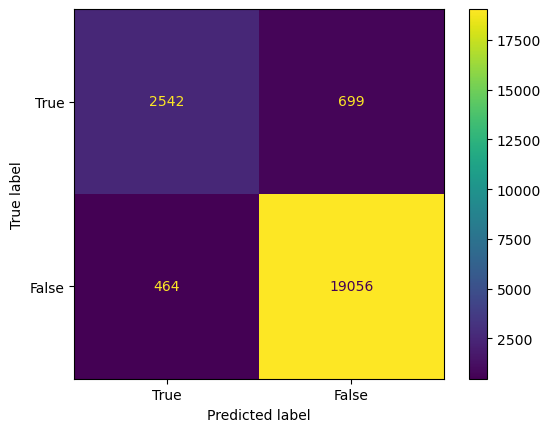

In [47]:
print("Testing accuracy %s" % accuracy_score(y_test,y_pred_XGB))

labels = [True,False]
cm = confusion_matrix(y_test,y_pred_XGB,labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

print(classification_report(y_test,y_pred_XGB))

# Prediction on Current Data

In [48]:
df2 = pd.read_csv("data/asdfgh.csv")
X_final = df2[["Doctor_segment__c","Days_Demo_to_Contract__c","Order_Age__c","Stage_age__c","Trade_In__c","Closed_Reason__c","Go_Digital__c","Sale_Type__c"]]



In [49]:
X_final = preprocess_data(X_final)

---Successfully processed numeric column(s)
  Doctor_segment__c  Days_Demo_to_Contract__c  Order_Age__c  Stage_age__c  \
0               NaN                  0.626984           0.0      0.102662   
1               NaN                  0.766789           0.0      0.165399   
2               NaN                  0.626984           0.0      0.102662   
3               NaN                  0.626984           0.0      0.102662   
4               NaN                  0.717949           0.0      0.260456   

  Trade_In__c Closed_Reason__c Go_Digital__c  Sale_Type__c  
0         NaN              NaN         False   Distributor  
1         NaN              NaN         False  LATAM Resale  
2         NaN              NaN         False   Distributor  
3         NaN              NaN         False   Distributor  
4         NaN              NaN         False  LATAM Resale  
---Successfully processed categorical column(s)
   Doctor_segment__c  Days_Demo_to_Contract__c  Order_Age__c  Stage_age__c  \
0

In [50]:
y_pred_XGB = modelXGB.predict(X_final)
y_pred_XGB_df = pd.DataFrame(y_pred_XGB)
y_pred_XGB_df.columns = ["IsWon"]
df2["PredictedIsWon"] = y_pred_XGB_df
df2 = df2.reset_index(drop=True)
df2.to_csv("output/new_asdfgh.csv",index=False)